# Airbnb Seattle Data

Following the Crisp-DM Process analyzing the Airbnb Seattle data the following steps must be done:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### Crisp-DM Step 1: Business Understanding

The Airbnb data providing 3 datasets:

calendar    -  prices and availability per day for the different homes
linsting    -  listed homes with different information (location, Amenites, Ratings, Host information, ...)
reviews     -  list of reviews for the offered homes (will not be used here)

This analysis should investigate:
- the relationship between the charged rental prices and the weekday/calendar week. 
- Another interesting question is how big the influence of different amenities (included in the listing data set) is on the rental prices.
- The last point to investigate is the importance of other citeria from the listing data frame to the prices. In the end a linear model should be trained and evaluted for predicting the rental prices.

#### Import Packages and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date

In [2]:
# load the data from https://www.kaggle.com/code/alianees/udacity-data-science-nanodegree-project-0/data?select=calendar.csv

calendar_df = pd.read_csv('./calendar.csv')
listing_df = pd.read_csv('./listings.csv')
reviews_df = pd.read_csv('./reviews.csv')

### Crisp-DM Step 2: Data Understanding of calendar_df 

In [3]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
calendar_df.shape

(1393570, 4)

The data set contains data of availability and price for the single homes per day. The price column seems to be of object type and must be changes to numeric. The availability can be changed to 1/0 instead of t/f. Furthermore the date can be sliced into year and month and additional information, such as weekday or calendar week can be added for analysis.

### Step 3: Data Preparation (Cleaning) of calendar_df

Find NAs

In [6]:
# check fo NAs
calendar_df.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

there are NAs for approximately 1/3 of the prices.

In [7]:
# NA rate for price
calendar_df['price'].isna().mean()

0.32938998399793334

Format the Price Values (remove $-signs and commata)

In [8]:
# remove $ sign and the thousands seperator ','
calendar_df['price'].replace('\$','',regex=True, inplace=True)
calendar_df['price'].replace('\,','',regex=True, inplace=True)


In [9]:
# convert price to numeric
calendar_df.price = pd.to_numeric(calendar_df.price)

Extract Month, Year, Day of the Week and No of Calendar Week from Date

In [10]:
# convert to pandas datetime object
calendar_df.date = pd.to_datetime(calendar_df.date)

In [11]:
# extrack month and year as separate columns
calendar_df['year'] = pd.DatetimeIndex(calendar_df.date).year
calendar_df['Month'] = pd.DatetimeIndex(calendar_df.date).month

In [12]:
# maybe the weekday can be of interest
calendar_df['Weekday'] = pd.DatetimeIndex(calendar_df.date).weekday

In [13]:
# add calendar week number as a column
calendar_df['Week'] = list(pd.DatetimeIndex(calendar_df.date).isocalendar().week)

convert Boolean Columns into 1 and 0

In [14]:
# replace t,f in cloumn 'availabele' with 1 and 0
calendar_df['available'].replace({'t':1, 'f': 0}, regex=True, inplace=True)

Check the results of the data preparation

In [15]:
# check th results
calendar_df.head()

,listing_id,date,available,price,year,Month,Weekday,Week
0,241032,2016-01-04,1,85.0,2016,1,0,1
1,241032,2016-01-05,1,85.0,2016,1,1,1
2,241032,2016-01-06,0,NaN,2016,1,2,1
3,241032,2016-01-07,0,NaN,2016,1,3,1
4,241032,2016-01-08,0,NaN,2016,1,4,1


### Crisp-DM Step 4: Modelling
for this Dataset no model will be trained. Questions of interest can be answered with meaningful plots.

### Crisp-DM Step 5: Evaluation
#### 1. Question: Influence of the Month, No of Calender week and Weekday on the average Price and Availability Rate

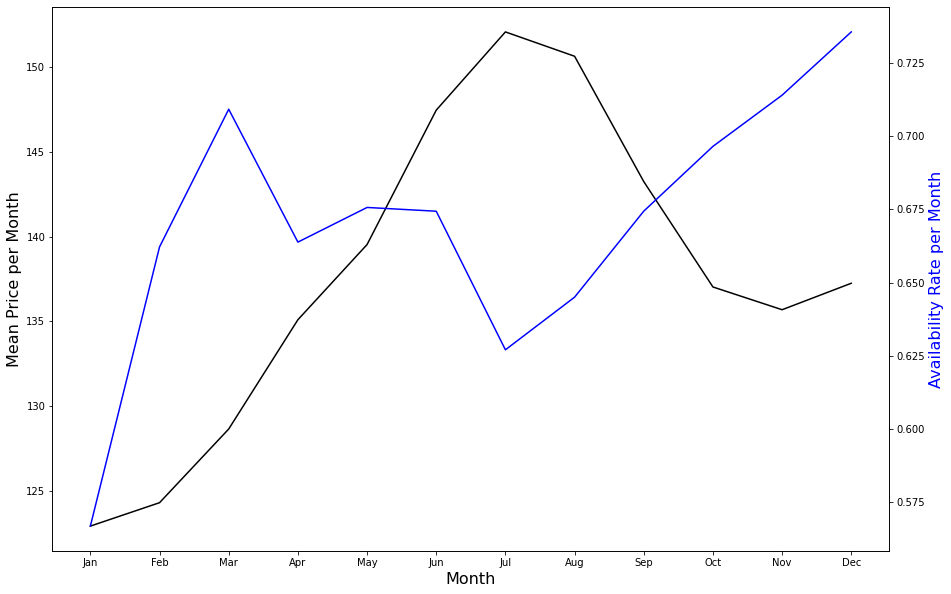

In [16]:
# plot availability rate and mean price per month
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_price_per_month = calendar_df.groupby('Month').mean()['price']
avail_rate_per_month = calendar_df.groupby('Month').sum()['available'] / calendar_df['Month'].value_counts().sort_index()


fig, ax1 = plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()
ax1.plot(month, mean_price_per_month, 'black')
ax2.plot(month, avail_rate_per_month, 'blue')

ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Price per Month', color='black', fontsize=16)
ax2.set_ylabel('Availability Rate per Month', color='blue', fontsize=16);


In this plot we can see that the highest rental prices ar charged during the summer months, the lowest prices ar at the beginning of the year. 

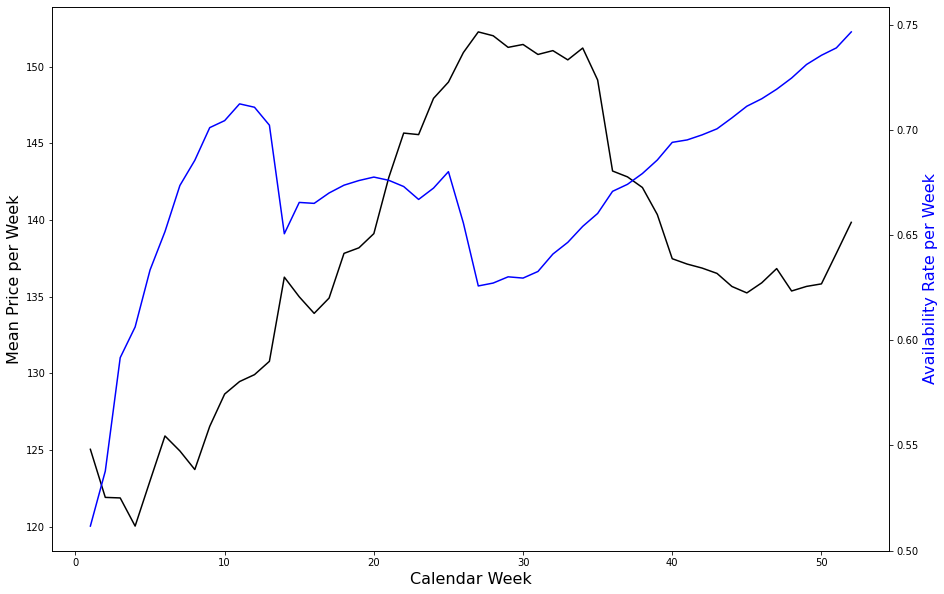

In [17]:
# plot availability rate and mean price per month
week = np.arange(1,53,1)
mean_price_per_week = calendar_df.groupby('Week').mean()['price']
avail_rate_per_week = calendar_df.groupby('Week').sum()['available'] / calendar_df['Week'].value_counts().sort_index()


fig, ax1 = plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()
ax1.plot(week, mean_price_per_week, 'black')
ax2.plot(week, avail_rate_per_week, 'blue')

ax1.set_xlabel('Calendar Week', fontsize=16)
ax1.set_ylabel('Mean Price per Week', color='black', fontsize=16)
ax2.set_ylabel('Availability Rate per Week', color='blue', fontsize=16);


a bit more detailed is this view, wenn we plot now for the calendar weeks. Here you can see for example, that the prices first increase in december in the time arrouround christmas. 

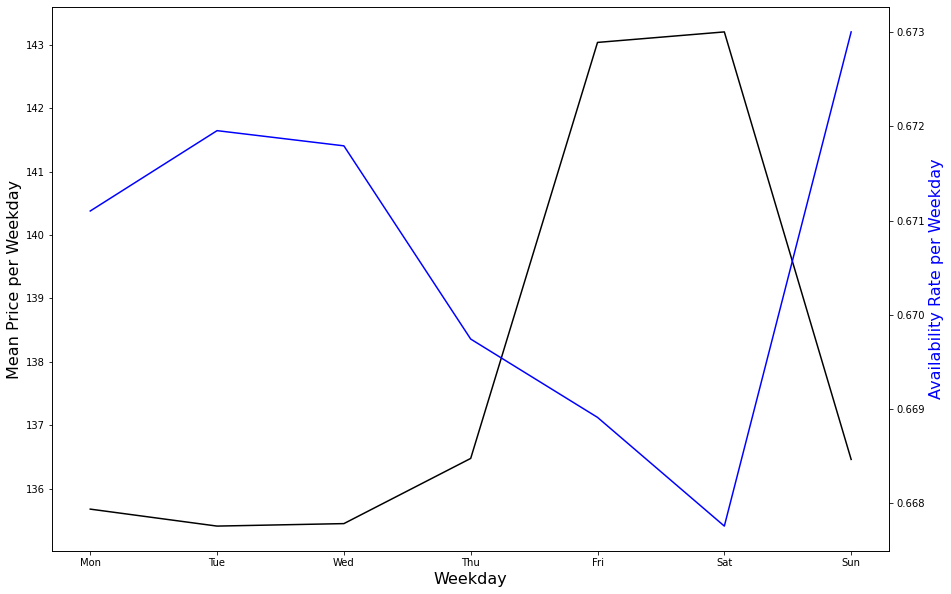

In [18]:
# check the availability rate and price during the week

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
mean_price_per_weekday = calendar_df.groupby('Weekday').mean()['price']
avail_rate_per_weekday = calendar_df.groupby('Weekday').sum()['available'] / calendar_df['Weekday'].value_counts().sort_index()


fig, ax1 = plt.subplots(figsize=(15,10))

ax2 = ax1.twinx()
ax1.plot(weekdays, mean_price_per_weekday, 'black')
ax2.plot(weekdays, avail_rate_per_weekday, 'blue')

ax1.set_xlabel('Weekday', fontsize=16)
ax1.set_ylabel('Mean Price per Weekday', color='black', fontsize=16)
ax2.set_ylabel('Availability Rate per Weekday', color='blue', fontsize=16);

if we plot the average prices for the weekdays, you can see that the prices strongly increase at the end of the week before the weekend (highest prices on friday/saturday)

### Crisp-DM Step 2: Data Understanding of listing_df 

In [19]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
listing_df.shape

(3818, 92)

In [21]:
# overview of the available columns
list(listing_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


identify columns with categorical or numerical values

In [22]:
# store column names for categorical and numerical columns
cat_cols = listing_df.select_dtypes(include='object').columns
num_cols = listing_df.select_dtypes(include=['int', 'float']).columns
{'Number of categorical columns': len(cat_cols), 'Number of Numerical columns': len(num_cols)}

{'Number of categorical columns': 62, 'Number of Numerical columns': 30}

In [23]:
len(cat_cols) + len(num_cols) == listing_df.shape[1]

True

The listing data provide a lot of information regarding the host (name, location, about, ...), amenities of the home, attributes of the home, reviews, ...
approximatel 2/3 of the columns are categorical, 1/3 numerical

### Step 3: Data Preparation (Cleaning) of listing_df

##### find NA proportions

In [24]:
# proportion of NAs
pd.Series(listing_df.isna().sum() / listing_df.shape[0]).sort_values(ascending=False)

license             1.000000
square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
weekly_price        0.473808
                      ...   
room_type           0.000000
accommodates        0.000000
bed_type            0.000000
amenities           0.000000
longitude           0.000000
Length: 92, dtype: float64

In [25]:
# columns with no NAs
listing_df.columns[listing_df.isna().mean() == 0]

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'experiences_offered', 'picture_url', 'host_id', 'host_url',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'room_type', 'accommodates', 'bed_type',
       'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

There are a few columns which are alomost completely NAN, these columns can be dropped from the DataFrame:

In [26]:
# drop columns with almost NA
listing_df = listing_df.drop(['license','square_feet'], axis=1)

##### find columns with only one unique value

In [27]:
# all columns with only one unique value
single_value_cols = list(listing_df.columns[listing_df.nunique() == 1])
single_value_cols

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

These columns which only contain always the same value can also be dropped:

In [28]:
listing_df = listing_df.drop(single_value_cols, axis=1)

##### find columns with urls

In [29]:
# all columns containing a url
url_cols = [col for col in listing_df.columns if 'url' in col]
url_cols

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

Columns which olny provide a url do not provide a relevant information for this analysis and can be dropped:

In [30]:
listing_df = listing_df.drop(url_cols, axis=1)

##### search for columns with prices and change the format: delete $ sign and thousands seperator and convert to float:

In [31]:
cat_cols = listing_df.select_dtypes(include='object').columns
num_cols = listing_df.select_dtypes(include=['int', 'float']).columns

In [32]:
# search for columns with prices
listing_df[cat_cols].columns[listing_df[cat_cols].apply(lambda col: col.str.contains('^[$][0-9]').any(),axis=0)]

Index(['summary', 'space', 'description', 'notes', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'],
      dtype='object')

In [33]:
# check for prices in other cloumns
listing_df[listing_df['summary'].str.contains('^[$][0-9]') == True]['summary']

1864    $117 per night ($138 per night June - August)....
Name: summary, dtype: object

In [34]:
# find just cloumns only with prices 
currency_cols = listing_df[cat_cols].columns[listing_df[cat_cols].apply(lambda col: col.str.contains('^[$][0-9]').all(),axis=0)]
currency_cols

Index(['price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'extra_people'],
      dtype='object')

In [35]:
# remove $ sign and comma and change currency to float in selected columns

for col in currency_cols:
    listing_df[col].replace('\$','',regex=True, inplace=True)
    listing_df[col].replace('\,','',regex=True, inplace=True)
    listing_df[col] = pd.to_numeric(listing_df[col])

In [36]:
listing_df[currency_cols].isna().sum()

price                  0
weekly_price        1809
monthly_price       2301
security_deposit    1952
cleaning_fee        1030
extra_people           0
dtype: int64

replace t/f by 1/0 for Boolean Columns:

In [37]:
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

In [38]:
# replace t and f by 1 and 0
for col in bool_cols:
    listing_df[col].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

Convert host rate columns

In [39]:
# replace % sign
listing_df['host_response_rate'].replace('\%','',regex=True, inplace=True)

In [40]:
# convert to numeric
listing_df['host_response_rate'] = pd.to_numeric(listing_df['host_response_rate']) / 100

In [41]:
# same for acceptance rate
listing_df['host_acceptance_rate'].replace('\%','',regex=True, inplace=True)
listing_df['host_acceptance_rate'] = pd.to_numeric(listing_df['host_acceptance_rate']) / 100


Columns with descriptions

In [42]:
description_cols = ['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit']

In [43]:
# drop columns with much text
listing_df = listing_df.drop(description_cols, axis=1)

Other columns to drop with less information

In [44]:
# columns to drop
# street, smart_location - information already in neighborhood, etc
# availability 30/60/90 somehow included in availability_365

col_drop = ['city', 'state', 'street', 'smart_location','is_location_exact', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'first_review', 'last_review']

In [45]:
# drop list above
listing_df = listing_df.drop(col_drop, axis=1)

In [46]:
# neighborhood and neighborhood_cleansed information also in neighborhood_group_cleansed

listing_df = listing_df.drop(['neighbourhood','neighbourhood_cleansed'], axis=1)

In [47]:
listing_df = listing_df.drop(['host_neighbourhood', 'host_verifications'], axis=1)

### 2. Question: Influence of listed Amenities on the Price

In [48]:
# remove parenthesis, etc in amenities column
listing_df['amenities'].replace(r'[\{\}\"\']', '', regex=True, inplace=True)


additional Data preparation: Get all different Amenity Categories

In [49]:
test = listing_df['amenities'].str.split(',')

In [50]:
# extract all different amenities categories

amenities = []
for i in range(len(test)):
    amenities = amenities + test[i]

amenitie_cat = pd.Series(amenities).unique()
amenitie_cat

array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool',
       'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype=object)

In [51]:
# initialize amenities DataFrame
amenities_df = pd.DataFrame(np.zeros((len(listing_df),len(amenitie_cat))), columns=amenitie_cat)

In [52]:
# fill amenities Dataframe 
for cat in amenitie_cat:
    for i in range(len(amenities_df)):
        if cat in test[i]:
            amenities_df[cat][i] = 1

In [53]:
amenities_df

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,...,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# drop empty category column
amenities_df = amenities_df.drop('', axis=1)

Analysis of Amenities on the Price

In [55]:
# add price to DataFrame
df = pd.concat([listing_df['price'], amenities_df], axis=1)

### Crisp-DM Step 5: Evaluation for Question 2

Plot Correlations of Amenities to the Price

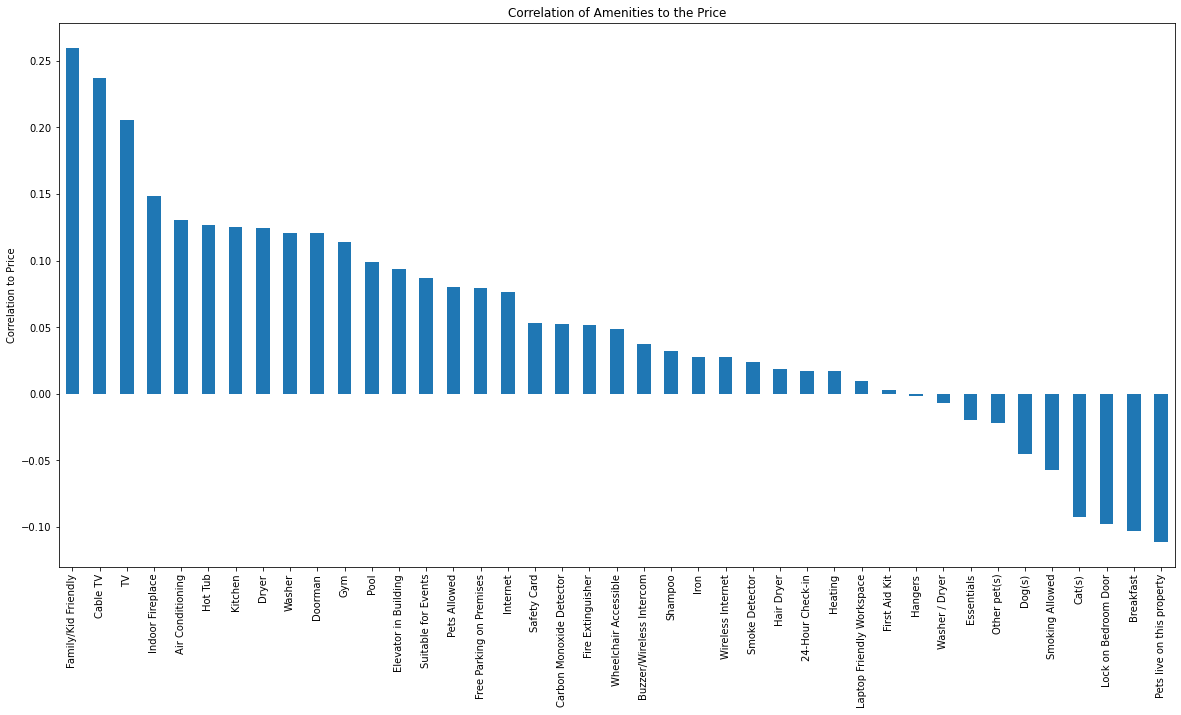

In [56]:
# plot most correlating amenities on the Price
plt.figure(figsize=(20,10))
df.corr()['price'].drop('price').sort_values(ascending=False).plot.bar();
plt.ylabel('Correlation to Price');
plt.title('Correlation of Amenities to the Price');

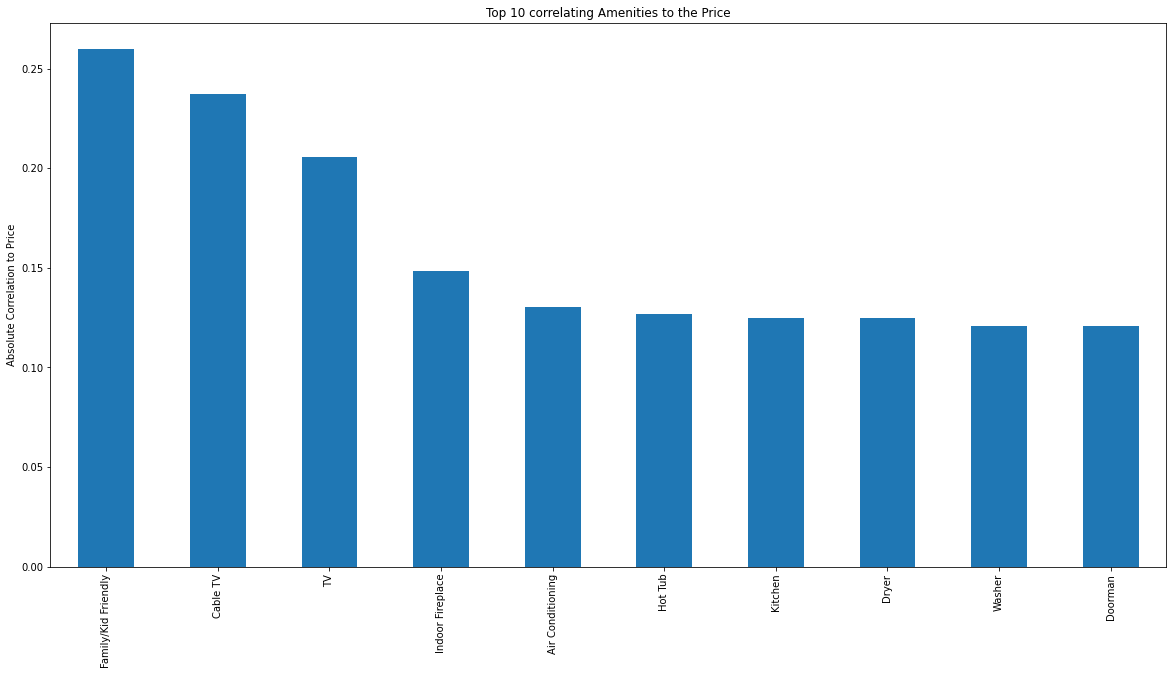

In [57]:
# plot most correlating amenities on the Price
plt.figure(figsize=(20,10))
df.corr()['price'].drop('price').abs().sort_values(ascending=False).head(10).plot.bar();
plt.ylabel('Absolute Correlation to Price');
plt.title('Top 10 correlating Amenities to the Price');

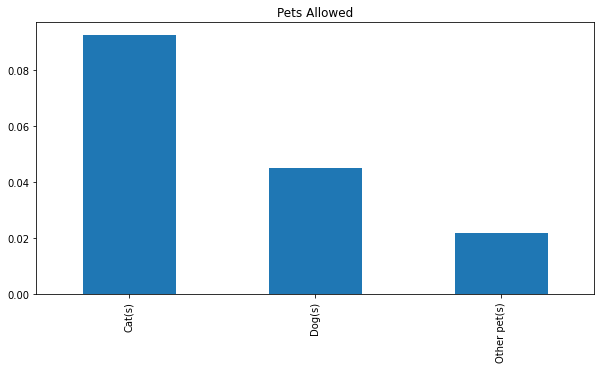

In [58]:
plt.figure(figsize=(10,5))
df.corr()['price'].drop('price').abs().sort_values(ascending=False)[['Cat(s)', 'Dog(s)', 'Other pet(s)']].plot.bar();
plt.title('Pets Allowed');

### Correlations of Amenities to the Review Score

In [59]:
list(listing_df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'zipcode',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_l

In [60]:
1 - listing_df.review_scores_rating.isna().mean()

0.8305395495023573

In [61]:
listing_df.review_scores_rating.isna()

0       False
1       False
2       False
3        True
4       False
        ...  
3813    False
3814    False
3815     True
3816     True
3817     True
Name: review_scores_rating, Length: 3818, dtype: bool

In [62]:
pd.DataFrame(listing_df.review_scores_rating.dropna() > 80).mean()

review_scores_rating    0.94292
dtype: float64

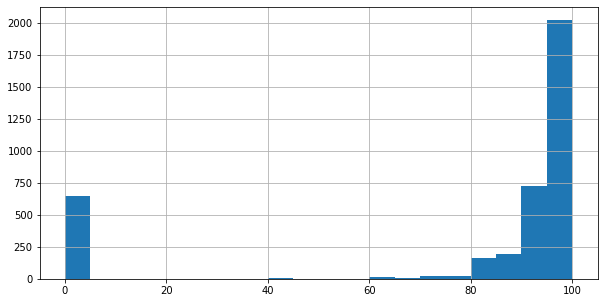

In [63]:
plt.figure(figsize=(10,5))
listing_df.review_scores_rating.fillna(0).hist(bins=20);

In [64]:
listing_df.accommodates.value_counts().sort_index()

1      256
2     1627
3      398
4      785
5      184
6      332
7       52
8      119
9       13
10      25
11       3
12      15
14       3
15       2
16       4
Name: accommodates, dtype: int64

In [65]:
# add review_scores_rating to DataFrame
df_rating = pd.concat([listing_df['review_scores_rating'], amenities_df], axis=1)

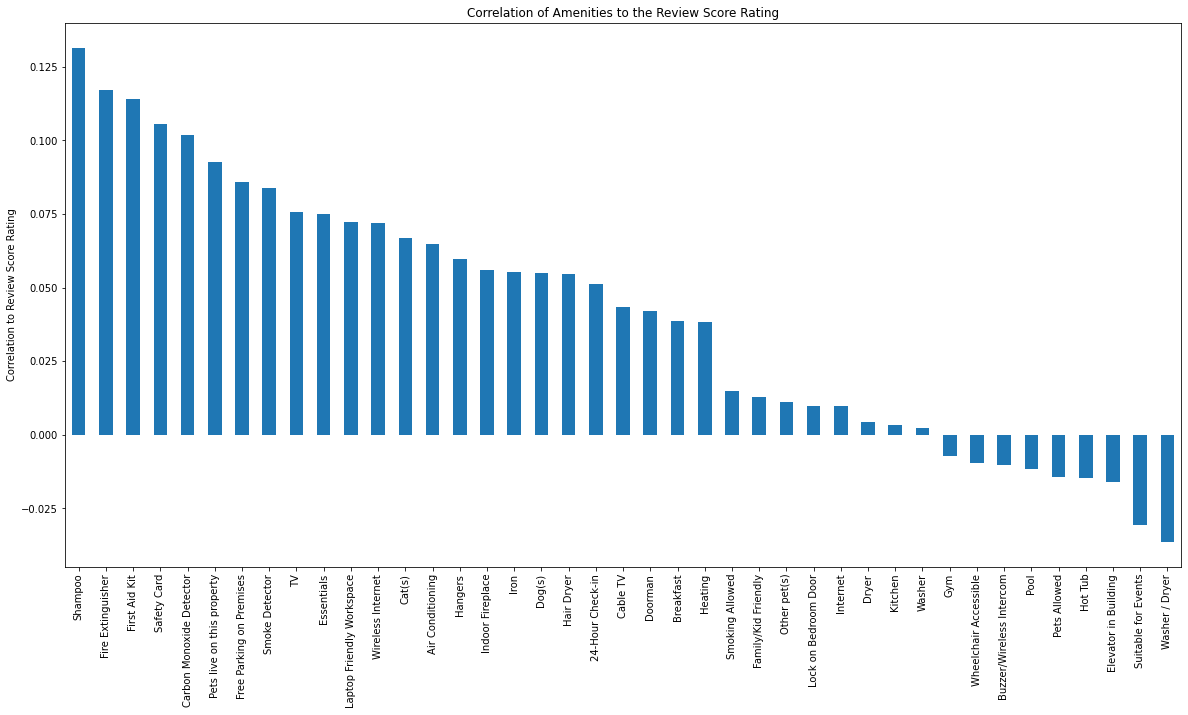

In [66]:
# plot most correlating amenities on the review score rating
plt.figure(figsize=(20,10))
df_rating.corr()['review_scores_rating'].drop('review_scores_rating').sort_values(ascending=False).plot.bar();
plt.ylabel('Correlation to Review Score Rating');
plt.title('Correlation of Amenities to the Review Score Rating');

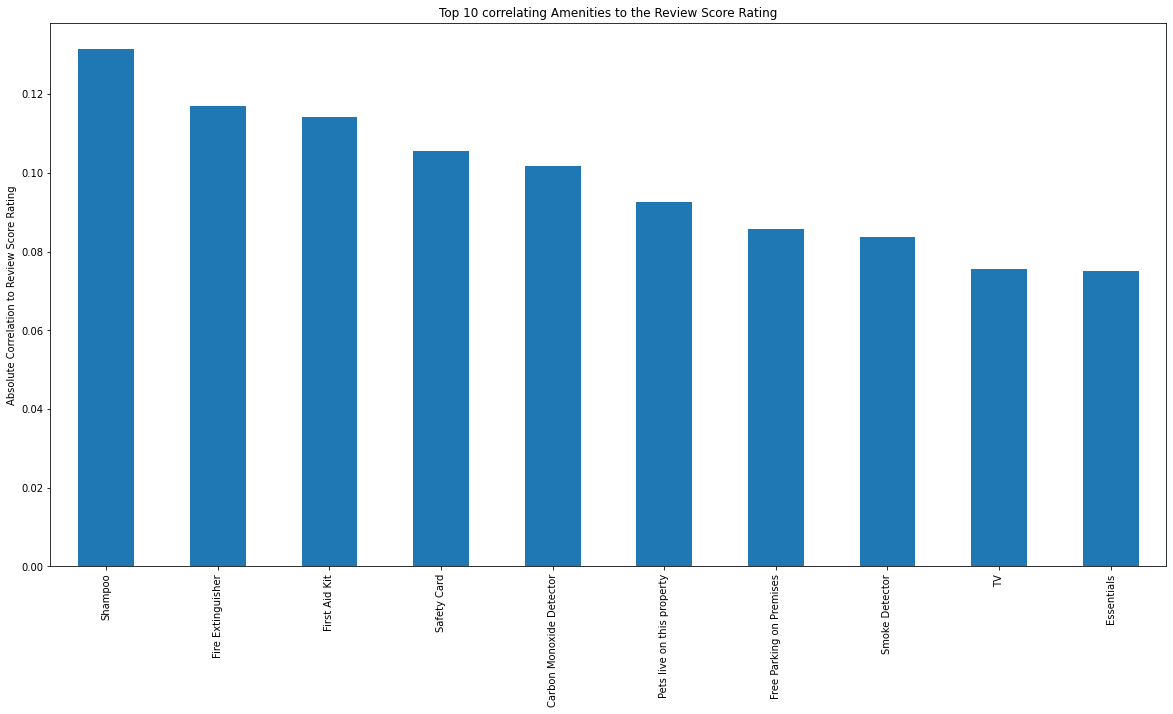

In [67]:
# plot most correlating amenities on the Price
plt.figure(figsize=(20,10))
df_rating.corr()['review_scores_rating'].drop('review_scores_rating').abs().sort_values(ascending=False).head(10).plot.bar();
plt.ylabel('Absolute Correlation to Review Score Rating');
plt.title('Top 10 correlating Amenities to the Review Score Rating');

Combined Plot

In [68]:
corr_price = df.corr()['price'].drop('price')
corr_rating = df_rating.corr()['review_scores_rating'].drop('review_scores_rating')

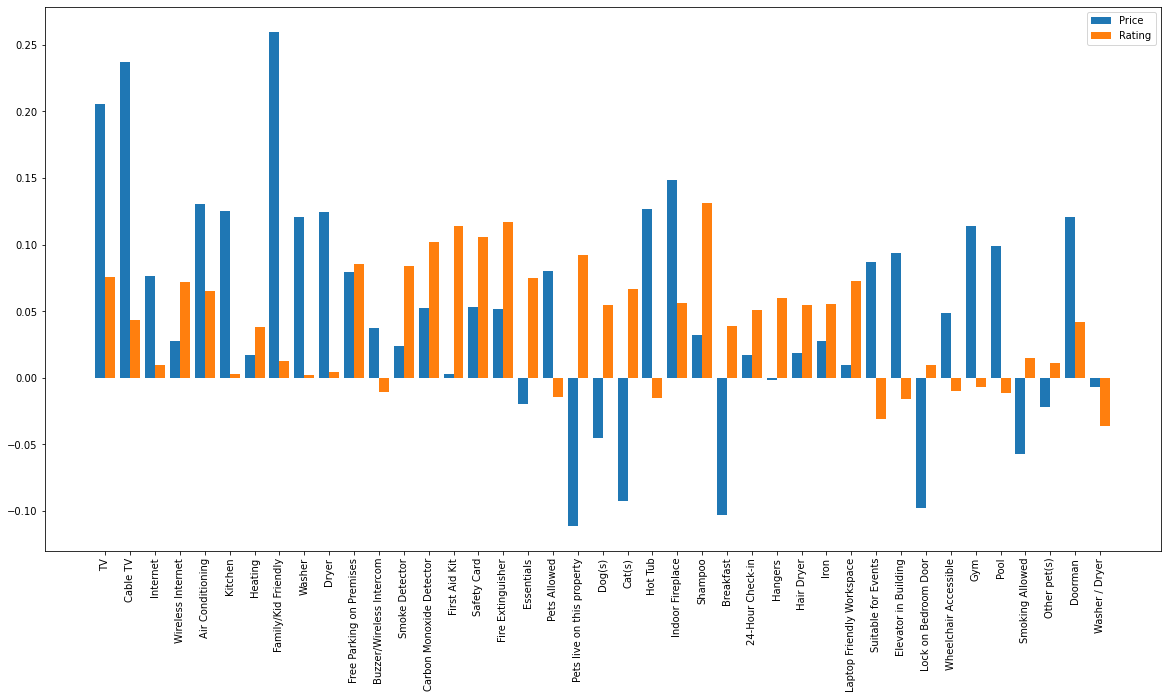

In [69]:
X_axis = np.arange(len(corr_price))

plt.figure(figsize=(20,10))
plt.bar(X_axis - 0.2, corr_price, 0.4, label='Price')
plt.bar(X_axis + 0.2, corr_rating, 0.4, label='Rating')

plt.xticks(X_axis, corr_price.index, rotation=90);
plt.legend();


### Crisp-DM Step 3: Data Preparation for the linear model

In [70]:
cat_cols = listing_df.select_dtypes(include='object').columns
num_cols = listing_df.select_dtypes(include=['int', 'float']).columns

In [71]:
len(cat_cols), len(num_cols)

(13, 38)

fill na

In [72]:
listing_df[num_cols].columns[listing_df[num_cols].isna().mean() > 0]

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'bathrooms',
       'bedrooms', 'beds', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [73]:
# fill NA with zeros
listing_df[num_cols] = listing_df[num_cols].fillna(0)

add amenities dummies from previous analysis to DataFrame

In [74]:
# change Column Names
amenities_df.columns = 'amenities_' + amenities_df.columns

In [75]:
amenities_df.columns = pd.Series(amenities_df.columns).replace(' ','_', regex=True)

In [76]:
listing_df = pd.concat([listing_df.drop('amenities', axis=1), amenities_df], axis=1)


create dummy variables for the rest of the categorical variables

In [77]:
listing_df = listing_df.drop(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate','host_acceptance_rate','host_about', 'host_is_superhost'], axis=1)

In [78]:
listing_df = listing_df.drop('zipcode',axis=1)

In [79]:
listing_df = listing_df.drop(['host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'], axis=1)

In [80]:
listing_df = listing_df.drop(['weekly_price', 'monthly_price', 'security_deposit','cleaning_fee', 'extra_people'], axis=1)

In [81]:
cat_cols = listing_df.select_dtypes(include='object').columns
num_cols = listing_df.select_dtypes(include=['int', 'float']).columns

In [82]:
temp_df = listing_df

In [83]:
# create dummy variables

for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            listing_df = pd.concat([listing_df.drop(col, axis=1), pd.get_dummies(listing_df[col], prefix=col, prefix_sep='_')], axis=1)
        except:
            continue

In [84]:
listing_df.shape

(3818, 109)

Calculate and plot highest correlating features for the Price

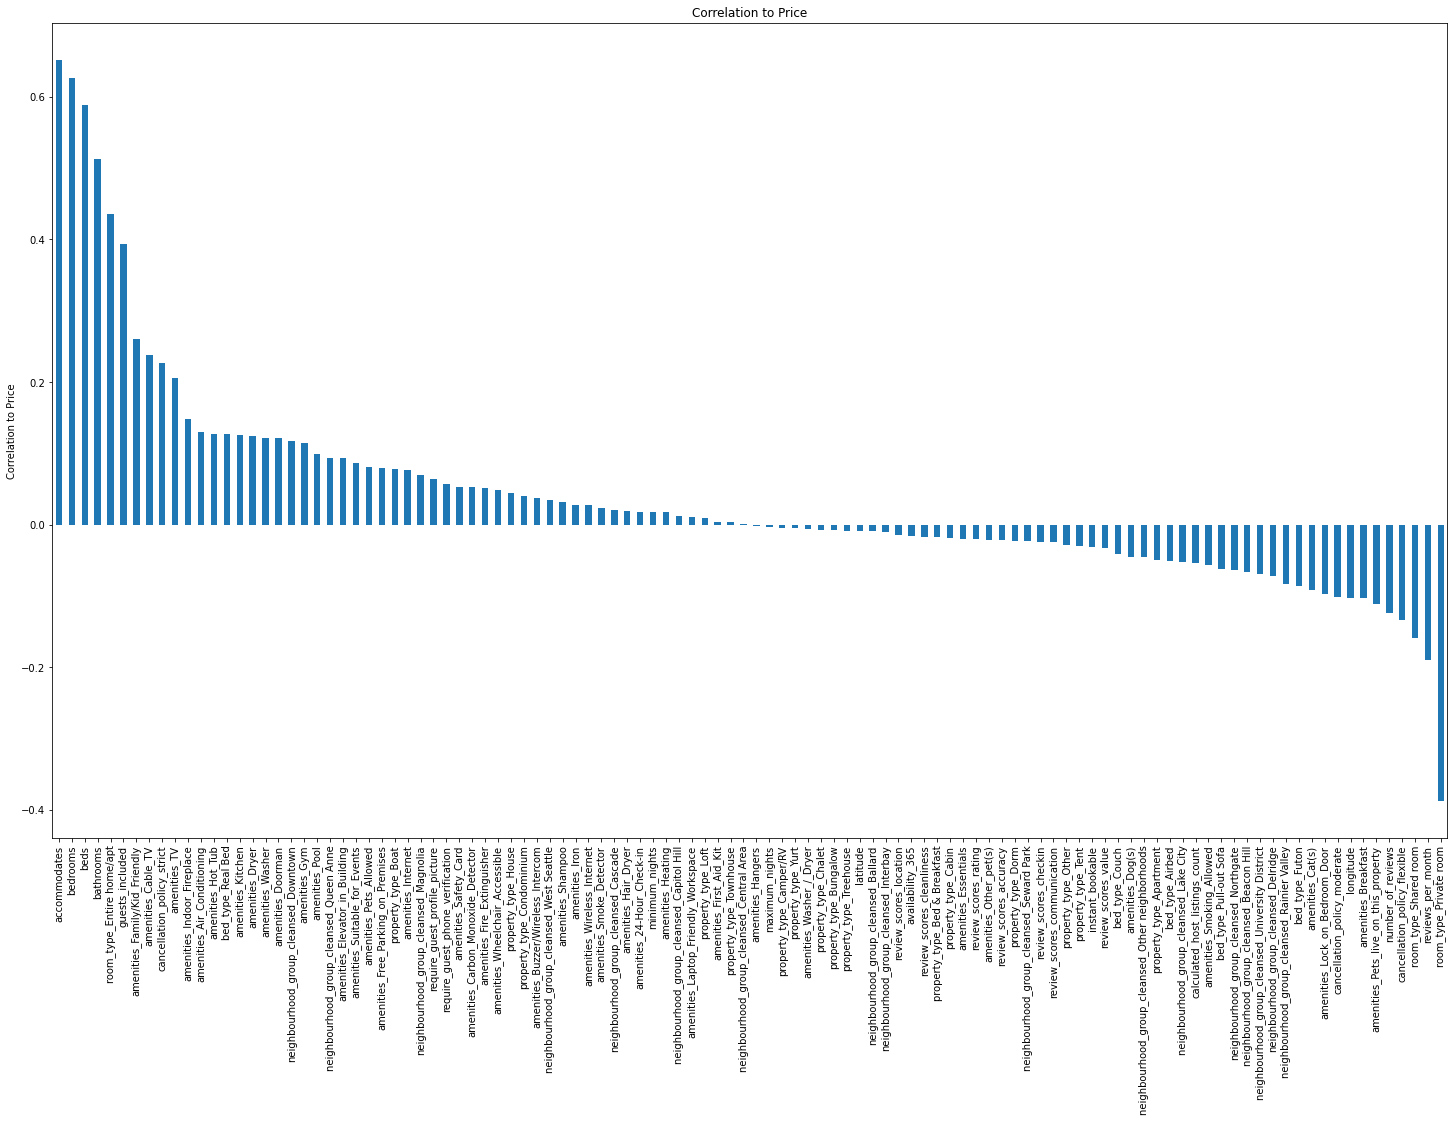

In [85]:
plt.figure(figsize=(25,15))
listing_df.corr()['price'].drop('price').sort_values(ascending=False).plot.bar();
plt.ylabel('Correlation to Price');
plt.title('Correlation to Price');

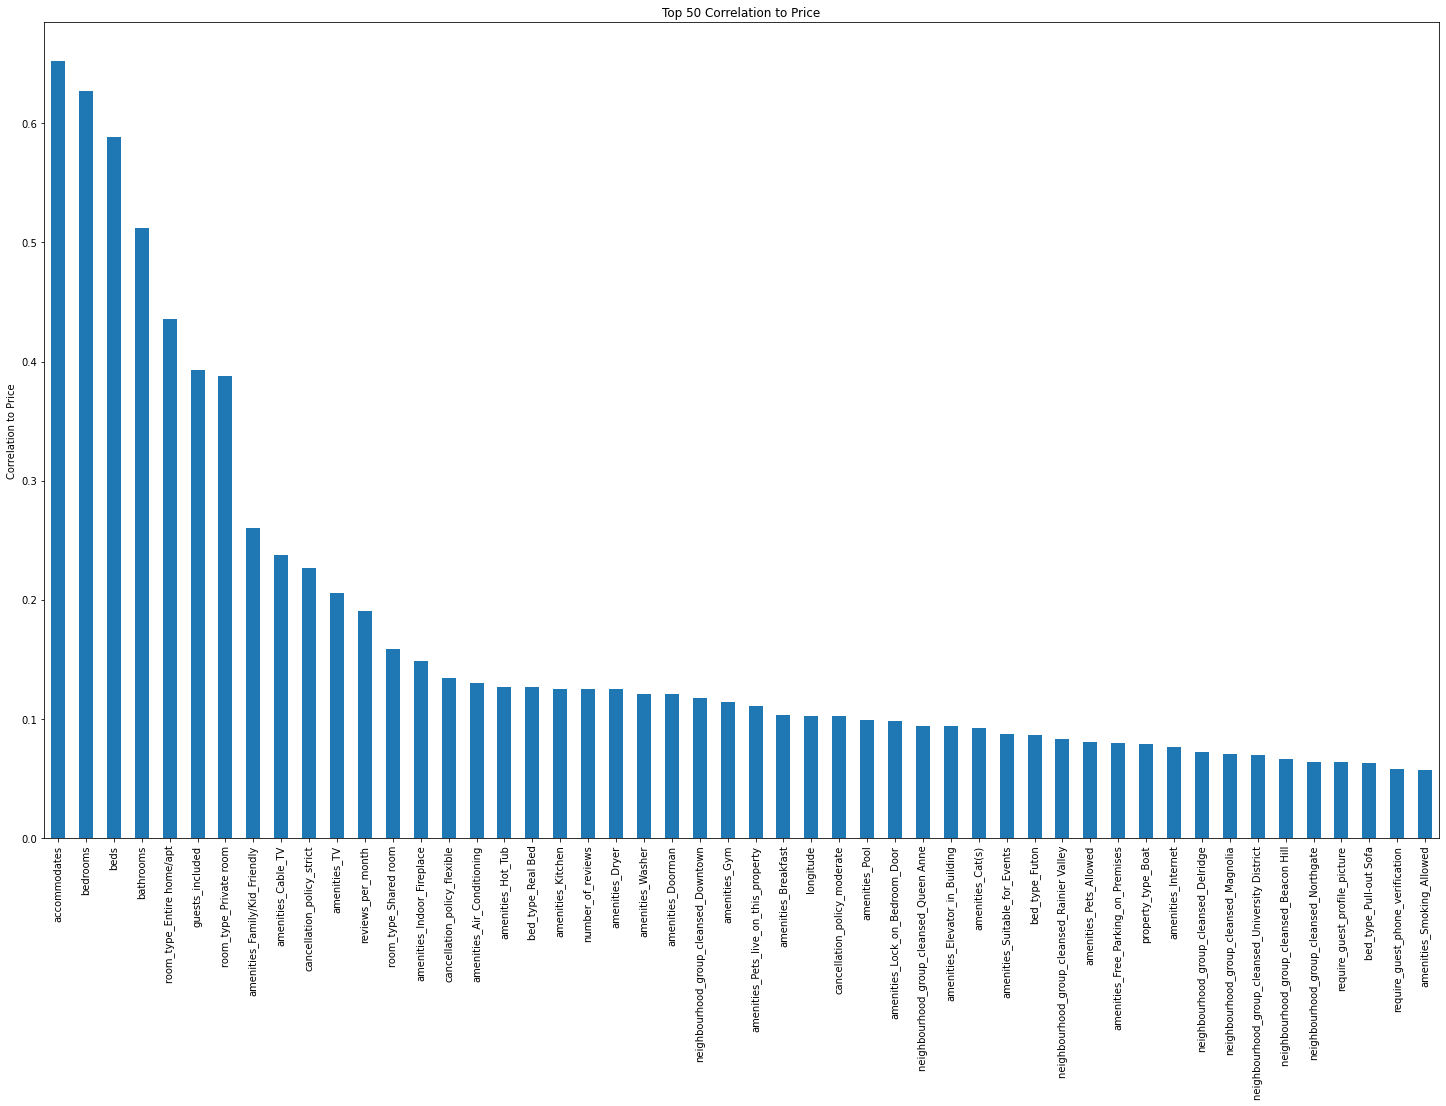

In [86]:
plt.figure(figsize=(25,15))
listing_df.corr()['price'].drop('price').abs().sort_values(ascending=False).head(50).plot.bar();
plt.ylabel('Correlation to Price');
plt.title('Top 50 Correlation to Price');

In [87]:
price_corr = listing_df.corr()['price'].drop('price').abs().sort_values(ascending=False)

In [88]:
features = price_corr.index[price_corr > 0.1]

In [89]:
len(features)

29

### Crisp-DM Step 4: train a linear model to predict the prices
##### Create linear Model to predict Prices

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [91]:
listing_df.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'guests_included', 'minimum_nights', 'maximum_nights',
       ...
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object', length=109)

In [92]:
# create X and y Dataset
X = listing_df.drop('price', axis=1)
y = listing_df['price']

In [93]:
# split Data into Train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [94]:
# fit linear model
%%capture --no-display

linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [95]:
y_test_pred = linear_model.predict(X_test)
y_train_pred = linear_model.predict(X_train)

In [96]:
r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

(0.6039984218258033, 0.5731308018527432)

Use less feature up to correlation of 0.1

In [97]:
X_10 = listing_df[features]

In [98]:
X_10_train, X_10_test, y_10_train, y_10_test = train_test_split(X_10, y, test_size=0.3, random_state=55)

In [99]:
# fit linear model
%%capture --no-display

linear_model = LinearRegression(normalize=True)
linear_model.fit(X_10_train, y_10_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [100]:
y_10_test_pred = linear_model.predict(X_10_test)
y_10_train_pred = linear_model.predict(X_10_train)

In [101]:
r2_score(y_10_train, y_10_train_pred), r2_score(y_10_test, y_10_test_pred)

(0.5550210717043778, 0.5622904647412874)

##### check the increased of R2 with increasing number of features
added in order of correlation


In [102]:
%%capture --no-display

r2_train = np.zeros(shape=len(price_corr.index))
r2_test = np.zeros(shape=len(price_corr.index))

y = listing_df['price']

for feat in range(len(price_corr.index)):
    X = listing_df[price_corr.index[:feat+1]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=15)
    linear_model = LinearRegression(normalize=True)
    linear_model.fit(X_train, y_train)
    y_test_pred = linear_model.predict(X_test)
    y_train_pred = linear_model.predict(X_train)
    r2_train[feat] = (r2_score(y_train, y_train_pred))
    r2_test[feat] = (r2_score(y_test, y_test_pred))
    


### Crisp-DM Step 5: Evaluation for the linear model rsults

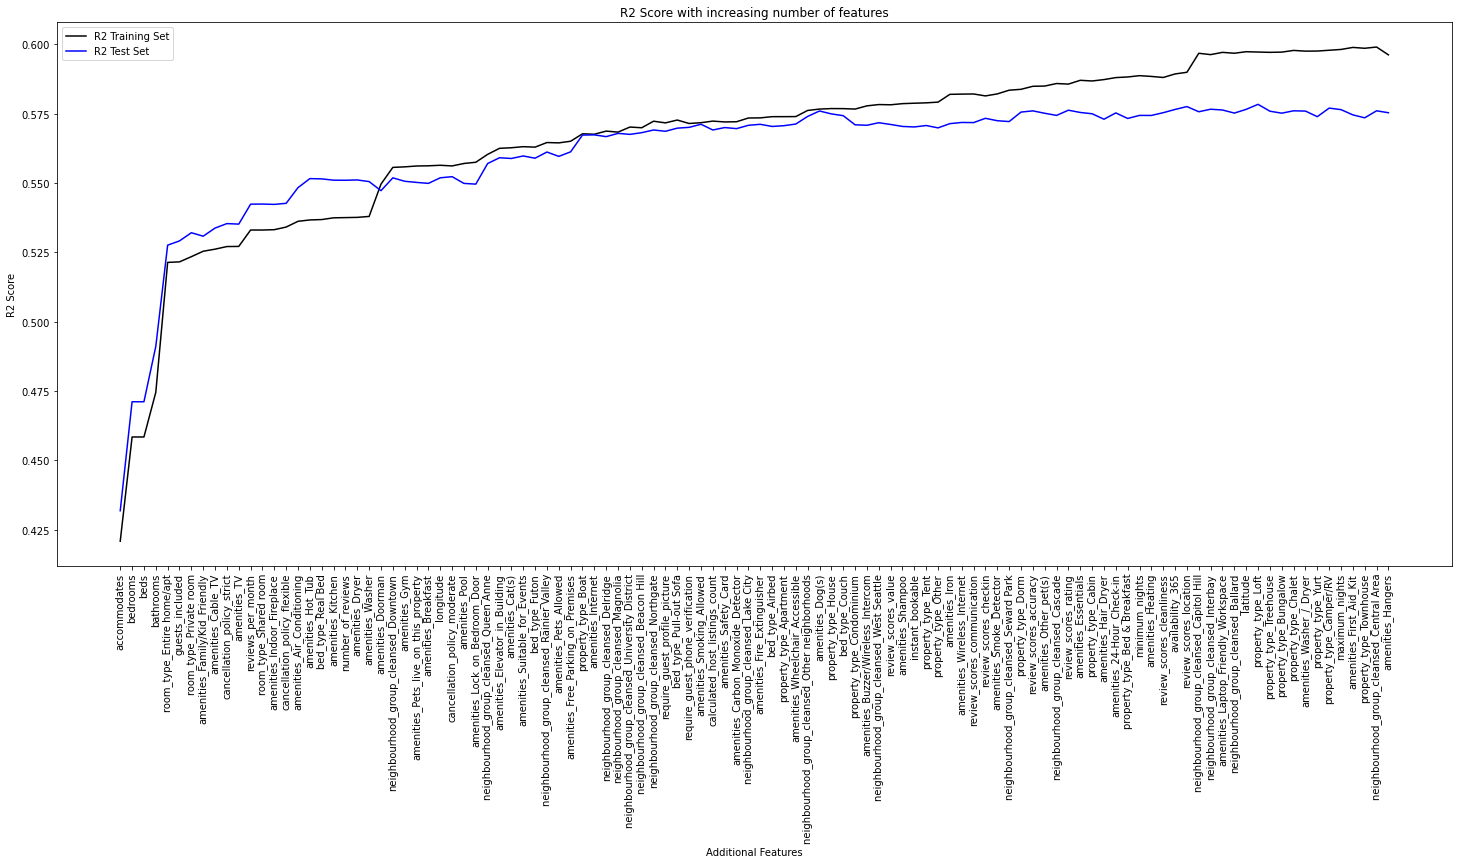

In [103]:
# plot the results

plt.figure(figsize=(25,10))

plt.plot(price_corr.index, r2_train, color='black', label='R2 Training Set')
plt.plot(price_corr.index, r2_test, color='blue', label='R2 Test Set')

plt.xticks(price_corr.index, rotation=90)
plt.xlabel("Additional Features")
plt.ylabel("R2 Score")
plt.title("R2 Score with increasing number of features")

plt.legend();

In [104]:
# correlation of 'beds' and 'bedrooms'
listing_df.corr()['beds'].drop('beds').sort_values(ascending=False)

accommodates                    0.860714
bedrooms                        0.752720
price                           0.588455
bathrooms                       0.528864
guests_included                 0.460561
                                  ...   
number_of_reviews              -0.088811
reviews_per_month              -0.119031
property_type_Apartment        -0.162845
cancellation_policy_flexible   -0.171431
room_type_Private room         -0.351102
Name: beds, Length: 108, dtype: float64